In [1]:
import numpy as np 
import pandas as pd 
import os
import PIL
import json
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random
from src import utility

In [2]:
""" This dataset by adience & open university of Israel provides us a total of 26,000 photos of 2284 subjects with 8 different Age groups (0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60-)"""

# Download data 
USER = ""
PASSWORD = ""

# download and extract data, obtain user and password from site above
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/aligned.tar.gz
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/fold_0_data.txt
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/fold_1_data.txt
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/fold_2_data.txt
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/fold_3_data.txt
# !wget --user $USER --password $PASSWORD http://www.cslab.openu.ac.il/download/adiencedb/AdienceBenchmarkOfUnfilteredFacesForGenderAndAgeClassification/fold_4_data.txt
# !tar xf aligned.tar.gz

In [3]:
# Read the data files
#  
root = os.getcwd()

fold_0 = os.path.join(root,'data','fold_0.txt')
fold_1 = os.path.join(root,'data','fold_1.txt')
fold_2 = os.path.join(root,'data','fold_2.txt')
fold_3 = os.path.join(root,'data','fold_3.txt')
fold_4 = os.path.join(root,'data','fold_4.txt')

fold_0 = pd.read_csv(fold_0, sep='\t')
fold_1 = pd.read_csv(fold_1, sep='\t')
fold_2 = pd.read_csv(fold_2, sep='\t')
fold_3 = pd.read_csv(fold_3, sep='\t')
fold_4 = pd.read_csv(fold_4, sep='\t')

In [4]:
print("fold_0.shape:", fold_0.shape)
print("fold_1.shape:", fold_1.shape)
print("fold_2.shape:", fold_2.shape)
print("fold_3.shape:", fold_3.shape)
print("fold_4.shape:", fold_4.shape)

fold_0.shape: (4484, 12)
fold_1.shape: (3730, 12)
fold_2.shape: (3894, 12)
fold_3.shape: (3446, 12)
fold_4.shape: (3816, 12)


In [5]:
fold_0.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [6]:
# Concatenate all folds 

df = pd.concat([fold_0,fold_1,fold_2,fold_3,fold_4])
print(df.shape)

(19370, 12)


In [7]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [8]:
# Drop all rows with missing values

df.dropna(inplace=True)

print(df['gender'].value_counts())


f    9372
m    8120
u    1099
Name: gender, dtype: int64


In [9]:
df_subset = df[df['gender'] == 'u']

# print(df_subset.head(10))

# Get the image paths of the uknown gender values 
gender_unknown_paths = df_subset.apply(axis=1,func = lambda x:f"{x.user_id}/landmark_aligned_face.{x.face_id}.{x.original_image}").values

print(gender_unknown_paths)

['29671106@N00/landmark_aligned_face.186.10211585463_7258e6f135_o.jpg'
 '29671106@N00/landmark_aligned_face.186.10163401925_8de461d88c_o.jpg'
 '29671106@N00/landmark_aligned_face.186.10230569703_7b328fd649_o.jpg' ...
 '20696814@N02/landmark_aligned_face.2256.11511754875_883737a136_o.jpg'
 '20696814@N02/landmark_aligned_face.2256.11551274885_3a571c6d6f_o.jpg'
 '20696814@N02/landmark_aligned_face.2256.10356952985_e2d68b3afc_o.jpg']


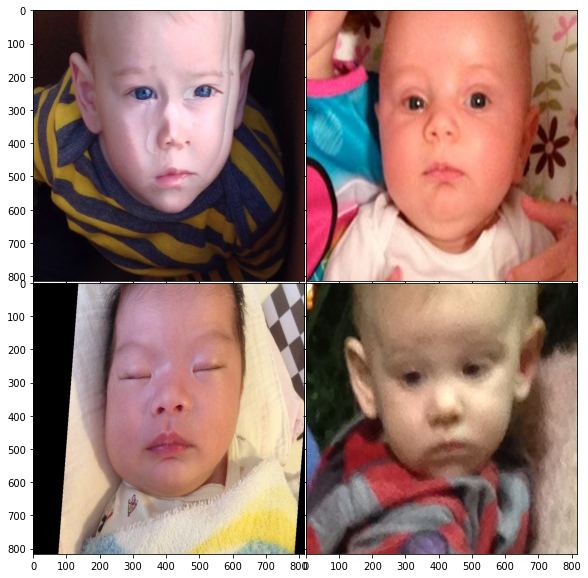

In [10]:
# Visualize the images in the 
utility.show_img(gender_unknown_paths,4)

In [11]:
df['age'].value_counts()

(25, 32)     4953
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2119
(15, 20)     1642
(60, 100)     867
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
None           40
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64

In [12]:
# Convert all age to age ranges and convert gender to numberical category 
# possible ranges - (0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60-)
# converted ranges- (0-2, 3-6, 8-13, 15-20, 25-32, 34-43, 45-53, 55-100)

age_range_map = {"(0, 2)":0,
                 "2":0,
                 "3":1,
                 "(4, 6)": 1,
                 "(8, 12)": 2,
                 "13":2,
                 "(15, 20)": 3,
                 "22":3,
                 "23":4,
                 "(25, 32)": 4,
                 "34":5,
                 "35":5,
                 "36":5,
                 "(38, 43)": 5,
                 "45":6,
                 "46":6,
                 "(48, 53)":6,
                 "55":7,
                 "56":7,
                 "57":7,
                 "(60, 100)":7
                 }
                 
gender_2_id = {"f":0,"m":1,"u":2}
df["age_id"] = df.age.map(age_range_map).astype(float)
df["gender_id"] = df.gender.map(gender_2_id).astype(float)

In [13]:
print(df['age_id'].value_counts())
print(df['gender_id'].value_counts())

4.0    5049
5.0    2747
0.0    2491
2.0    2287
1.0    2158
3.0    1791
7.0     967
6.0     914
Name: age_id, dtype: int64
0.0    9372
1.0    8120
2.0    1099
Name: gender_id, dtype: int64


In [14]:
# dropped all non mapped items 
df.dropna(inplace=True)

In [15]:
df.shape

(18404, 14)

In [16]:
# all Image paths 
paths = df.apply(axis=1,func = lambda x:f"{x.user_id}/landmark_aligned_face.{x.face_id}.{x.original_image}").values
paths

array(['30601258@N03/landmark_aligned_face.1.10399646885_67c7d20df9_o.jpg',
       '30601258@N03/landmark_aligned_face.2.10424815813_e94629b1ec_o.jpg',
       '30601258@N03/landmark_aligned_face.1.10437979845_5985be4b26_o.jpg',
       ...,
       '101515718@N03/landmark_aligned_face.2279.10587571495_a61785cd06_o.jpg',
       '50458575@N08/landmark_aligned_face.2281.9426695459_9e8b347604_o.jpg',
       '50458575@N08/landmark_aligned_face.2281.9429464468_1bfc39ecfb_o.jpg'],
      dtype=object)

In [17]:
# Distribution of Image sizes 
root = './data/aligned'
utility.distribution_of_image_sizes(image_paths=paths,root=root)

Counter({(816, 816, 3): 18404})


In [ ]:

Root = os.getcwd()

data_dict = {paths[i]:{"gender_id":df.gender_id.values[i], "age_id":df.age_id.values[i]} for i in range(len(df))},
    

with open('./data/data_dict.json', 'w') as fp:
    json.dump(data_dict, fp)